# Aprendizaje No-Supervisado

Recordemos que el proposito del aprendizaje automatico superviado es predecir la realidad. El aprendizaje no supervisado tiene como proposito clasificar la realidad y generar predicciones sobre esta clasificacion. El aprendizaje no supervisado clasifica por similaridad.



La principal ventaja del aprendizaje no supervisado es que no se necesitan series de datos etiquetadas para proceder a la clasificacion.

La gran mayoria de modelos de aprendizaje no supervisado utilizan tecnicas de agrupacion por similaridad (distancia) entre parametros.

Vamos a necesitar los siguientes modulos:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

Generamos un grupo de puntos utilizando la funcion make_blobs:

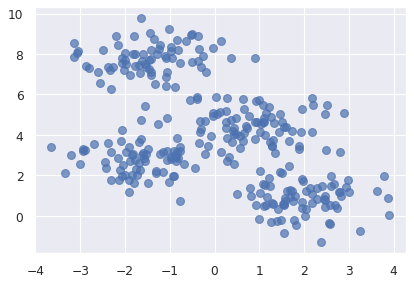

In [3]:
puntos, idx_grupos = make_blobs(n_samples=300,
                                centers=4,
                                cluster_std=0.8,
                                random_state=0)

x = puntos[:, 0]
y = puntos[:, 1]

plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(x, y, s=50, alpha=0.7);

Podemos ajustar estos puntos a un numero determinado de grupos:

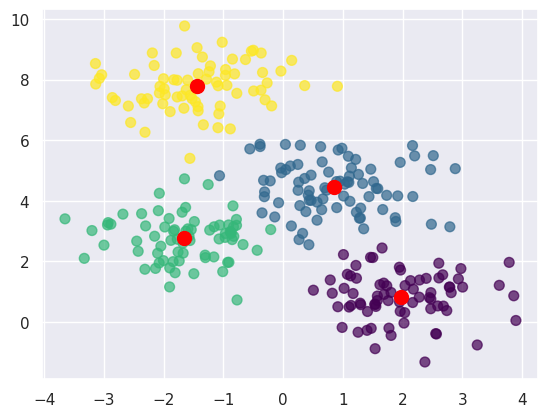

In [4]:
# https://scikit-learn.org/stable/modules/clustering.html#k-means
k_medias = KMeans(n_clusters=4, random_state=0, n_init="auto")
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)

plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')

centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Este es el procedimiento del algoritmo:

![picture](https://drive.google.com/uc?export=view&id=1-05xoK1X6jPUlA-lRg-E2mSP7STLM-Me)

¿Puedes probar a agrupar estos puntos en otro numero de grupos: 2, 3, 5 y 15 grupos?¿Que efecto tiene en la posicion de los centroides?¿Cual es el numero correcto de grupos?

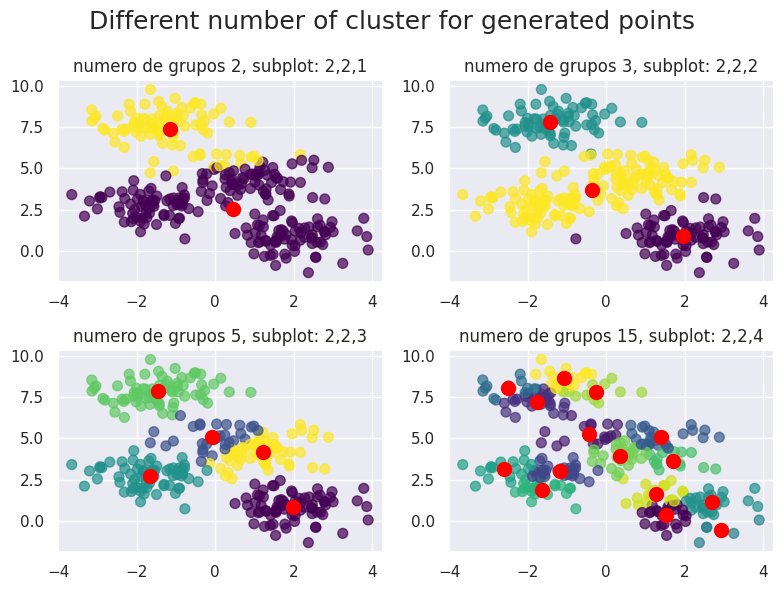

In [5]:
import matplotlib.pyplot as plt
numero_de_grupos =[2,3,5,15]

#  Categorical Data
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (8,6))
plt.suptitle("Different number of cluster for generated points", fontsize = 18)

for n_grop in numero_de_grupos:

    k_medias = KMeans(n_clusters=n_grop, random_state=0, n_init="auto")
    k_medias.fit(puntos)
    idx_prediccion = k_medias.predict(puntos)
    plt.subplot(a, b, c)
    plt.title('numero de grupos {}, subplot: {},{},{}'.format(n_grop, a, b, c))
    plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
    centroides = k_medias.cluster_centers_
    plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);
    c = c + 1

plt.tight_layout()
plt.show()


- cambiar el número de centroide deseado causa un cambio en la posición del centroide para encontrar el centroide más cercano para cada grupo.
- Dado que generamos datos sintéticos con 4 centros, el número correcto de grupos es 4. Además, podemos descubrir visualmente que los datos se pueden agrupar en 4 grupos.
- además, como se puede ver a continuación, estamos buscando un buen modelo en términos de baja inercia Y bajo número de grupos (K).


Podemos utilizar un metodo menos visual para decidir el numero de grupos que nos ofrece la clasificacion mas efectiva:

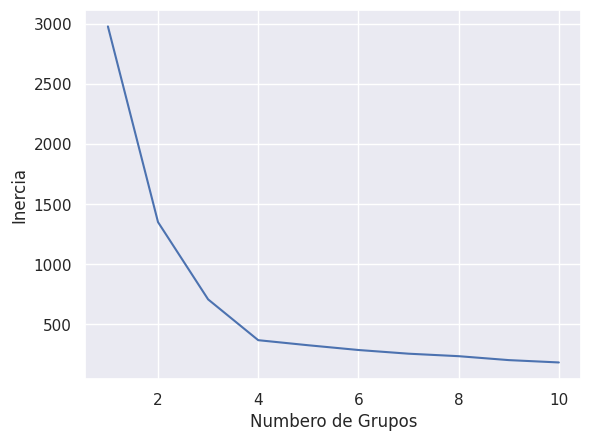

In [6]:
inercias = []

for i in range(1, 11):
  k_medias = KMeans(n_clusters=i, random_state=0, n_init="auto")
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)

plt.plot(range(1, 11), inercias)
plt.xlabel('Numbero de Grupos')
plt.ylabel('Inercia');

In [7]:
i #centroids

10

In [8]:
inercias #corresponding inercias

[2978.591938451077,
 1351.3703238927765,
 708.8374370591803,
 369.52798550013677,
 327.29240220226853,
 287.85022649053894,
 257.1751137768583,
 236.45951644847204,
 203.83535442480735,
 184.33276131342586]

Ya que el metodo visual no es muy mecanico, podemos encontrar la posicion del mejor valor en el codo mediante la doble derivacion:

In [9]:
pct_difs = np.diff(inercias)/np.array(inercias[1:])
pct_difs

array([-1.20412709, -0.90646015, -0.91822396, -0.12904541, -0.13702326,
       -0.11927714, -0.08760737, -0.16005154, -0.10580101])

In [10]:
pct_dif_dif = np.diff(pct_difs)
pct_dif_dif

array([ 0.29766694, -0.01176382,  0.78917855, -0.00797784,  0.01774611,
        0.03166977, -0.07244416,  0.05425052])

In [11]:
np.argmax(pct_dif_dif)

2

In [12]:
mejor_codo = np.argmax(pct_dif_dif)+2
mejor_codo

4

# Segmentacion de clientes

Datos adaptados de:
https://github.com/jeffprosise/Machine-Learning/blob/master/Data/customers.csv

Este tipo de tecnicas se pueden utilizar para segmentar, por ejemplo, los clientes de una empresa para poder ofrecerles el mejor servicio personalizado posible:

In [13]:
%cd /content/drive/MyDrive/comp480

/content/drive/MyDrive/comp480


In [14]:
import pandas as pd

archivo_clientes = 'customers.csv'
clientes = pd.read_csv(archivo_clientes, index_col='CustomerID')
clientes.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [15]:
# Before renaming the columns
print(clientes.columns)

clientes.rename(columns = {'Gender':'Genero', 'Annual Income (k$)':'Salario',
                              'Age':'Edad', 'Spending Score (1-100)':'Clasificacion_gasto'}, inplace = True)

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


Salario y Clasificacion de Gasto nos pueden indicar que clientes podrian estar interesados en aumentar su nivel de compras:

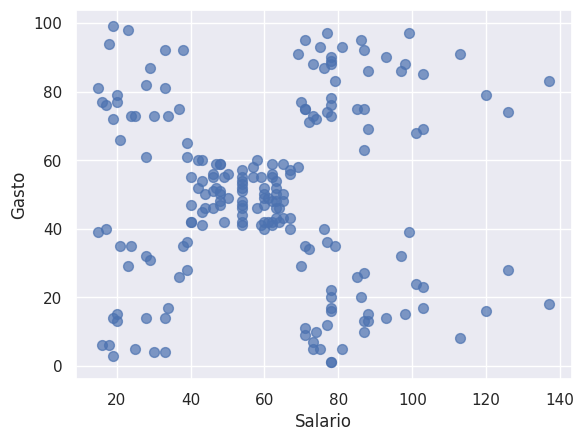

In [16]:
puntos = clientes[ ['Salario','Clasificacion_gasto'] ].values
x = puntos[:, 0]
y = puntos[:, 1]

plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Salario')
plt.ylabel('Gasto');

¿En cuantos grupos podemos agruparlos? Visualmente parece que 5 grupos nos dan el menor numero de grupos que maximiza las diferencias entre los clientes de cada grupo.

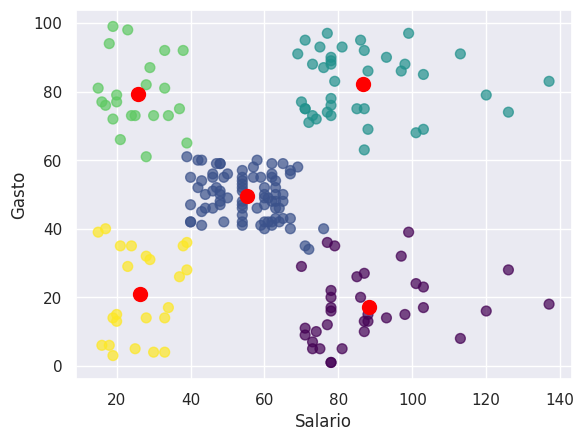

In [17]:
k_medias = KMeans(n_clusters=5, random_state=0, n_init="auto")
k_medias.fit(puntos)
idx_prediccion = k_medias.predict(puntos)

plt.scatter(x, y, c=idx_prediccion, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Salario')
plt.ylabel('Gasto')

centroides = k_medias.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100);

Hemos elegido 5 grupos por inspeccion visual del grafico. ¿Podrias demostrar que esta eleccion es correcta?

The first deviation points [-0.44868533 -0.75238182 -0.43946189 -0.66216451 -0.19273912 -0.17749022
  0.00658503 -0.19633316 -0.0397252  -0.34609891 -0.12001212 -0.09666226
 -0.08593778 -0.10129156 -0.09801608 -0.03519563 -0.14483593 -0.13770297]
The second deviation points [-0.3036965   0.31291993 -0.22270261  0.46942538  0.01524891  0.18407525
 -0.2029182   0.15660796 -0.3063737   0.22608679  0.02334986  0.01072449
 -0.01535378  0.00327548  0.06282045 -0.10964031  0.00713296]
The right number of centroid is : 5


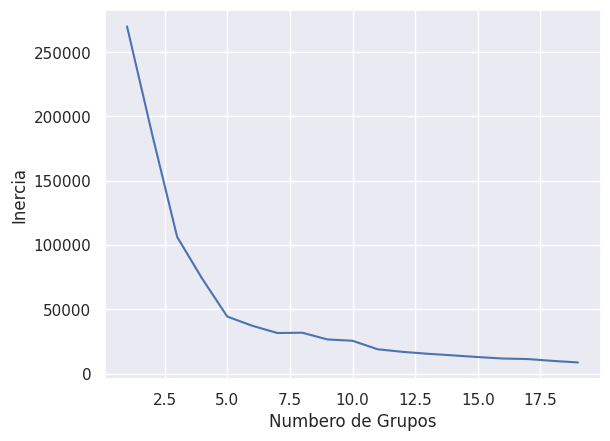

In [18]:
inercias = []

for i in range(1, 20):
  k_medias = KMeans(n_clusters=i, random_state=0, n_init="auto")
  k_medias.fit(puntos)
  inercias.append(k_medias.inertia_)

plt.plot(range(1, 20), inercias)
plt.xlabel('Numbero de Grupos')
plt.ylabel('Inercia');

pct_difs = np.diff(inercias)/np.array(inercias[1:])
print("The first deviation points", pct_difs)

pct_dif_dif = np.diff(pct_difs)
print("The second deviation points", pct_dif_dif)

np.argmax(pct_dif_dif)

mejor_codo = np.argmax(pct_dif_dif)+2
print("The right number of centroid is :", mejor_codo)

¿Cuales son los clientes con mayor salario y menor gasto? Podemos predecir en que grupo apareceria un cliente que tenga un salario de 120 y un gasto de 20:

In [19]:
objetivo = k_medias.predict(np.array([[90, 10]]))[0]
objetivo

0

Los clientes de este grupo de interes se pueden extraer de la serie de datos completa:

In [20]:
# Grupo de poco gastadores con altos ingresos:

clientes['Grupo'] = k_medias.predict(clientes[['Salario','Clasificacion_gasto']].values) # 0,1,2,3,4 and 5
# Filtrado solo para estos clientes:
clientes[ clientes['Grupo'] == objetivo]

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
CustomerID,,,,,
171,Male,40,87,13,0
173,Male,36,87,10,0
175,Female,52,88,13,0
177,Male,58,88,15,0
179,Male,59,93,14,0
183,Male,46,98,15,0


Orientando nuestros esfuerzos de marketing y ventas hacia estos clientes quizas maximicemos nuestra eficacia. Otro modelo podria entonces clasificar los clientes por susceptibilidad a nuestras ofertas.

# Clasificacion Multivariable

La clasificacion no esta limitada a dos variables (bivariable), sino que puede ser multivariable. Para ello, debemos primero modificar el formato de nuestros datos para hacer todas las variables comprensibles por la maquina:

In [21]:
from sklearn.preprocessing import LabelEncoder

df = clientes.copy()
codificador = LabelEncoder()
df['Genero'] = codificador.fit_transform(df['Genero']) #0 or 1
df.head()

,Genero,Edad,Salario,Clasificacion_gasto,Grupo
CustomerID,,,,,
1,1,19,15,39,2
2,1,21,15,81,17
3,0,20,16,6,5
4,0,23,16,77,17
5,0,31,17,40,2


Usaremos 3 variables inicialmente, es el limite de variables que podemos representar facilmente en el espacio tridimensional:

In [22]:
puntos = df[['Edad', 'Salario', 'Clasificacion_gasto']].values
# kmeans initiallization
k_medias = KMeans(n_clusters=5, random_state=0, n_init='auto')
# kmeans training
k_medias.fit(puntos)
# kmeans training
df['Grupo'] = k_medias.predict(puntos)
df.Grupo

CustomerID
1      3
2      3
3      2
4      3
5      2
      ..
196    4
197    0
198    4
199    0
200    4
Name: Grupo, Length: 200, dtype: int32

Generamos una visualizacion tridimensional:

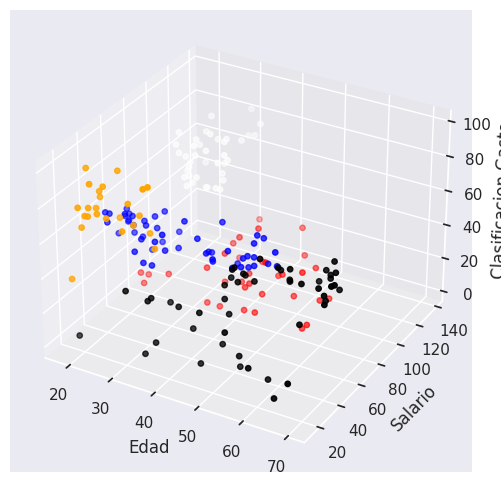

In [23]:
from mpl_toolkits.mplot3d import Axes3D
colors = ['red', 'blue', 'black', 'orange', 'white']

df['color'] = df.Grupo.map({0:colors[0], 1:colors[1], 2:colors[2],
                        3:colors[3], 4:colors[4]})
fig = plt.figure(figsize=(26,6))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Edad, df.Salario , df.Clasificacion_gasto, c=df.color, s=15)
ax.set_xlabel('Edad')
ax.set_ylabel('Salario')
ax.set_zlabel('Clasificacion Gasto')
plt.show()

¿Como son estos grupos? Inspeccionando sus valores medios ganamos algo mas de informacion:

In [24]:
resultados = pd.DataFrame(columns = ['Grupo',
                                     'Edad',
                                     'Ingresos Medios',
                                     'Gasto Medio'])

for i in range(len(k_medias.cluster_centers_)):
    edad = df[df['Grupo'] == i]['Edad'].mean()
    ingresos = df[df['Grupo'] == i]['Salario'].mean()
    gasto = df[df['Grupo'] == i]['Clasificacion_gasto'].mean()

    gdf = df[df['Grupo'] == i]

    resultados.loc[i] = ([i, edad, ingresos, gasto])

resultados.head()

,Grupo,Edad,Ingresos Medios,Gasto Medio
0,0.0,41.647059,88.735294,16.764706
1,1.0,33.396226,58.056604,48.773585
2,2.0,54.060000,40.460000,36.720000
3,3.0,25.250000,25.833333,76.916667
4,4.0,32.692308,86.538462,82.128205


In [25]:
# prediction on new data
k_medias.predict(np.array([[20, 20, 20]]))[0]

2